# Bike Sharing Assignment - Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Step 1: Reading and Understanding the Data

In [1]:
# import statements

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing train_test_split and MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Adding a constant variable 
import statsmodels.api as sm  
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# read the csv data
bike_df = pd.read_csv("day.csv")

In [3]:
# check shape of df
bike_df.shape

(730, 16)

In [4]:
# view first few rows of data
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# drop irrelevant columns 
bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
# double check no null values
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [8]:
# Defining the type of columns in df

#  #   Column      Non-Null Count  Dtype  
#  ---  ------      --------------  -----  
#   0   season      730 non-null    int64  -- categorical
#   1   yr          730 non-null    int64  -- categorical
#   2   mnth        730 non-null    int64  -- categorical
#   3   holiday     730 non-null    int64  -- categorical
#   4   weekday     730 non-null    int64  -- categorical
#   5   workingday  730 non-null    int64  -- categorical
#   6   weathersit  730 non-null    int64  -- categorical
#   7   temp        730 non-null    float64 -- numeric
#   8   atemp       730 non-null    float64 -- numeric
#   9   hum         730 non-null    float64 -- numeric
#   10  windspeed   730 non-null    float64 -- numeric
#   11  cnt         730 non-null    int64 -- numeric

## Step 2: Data Visualization

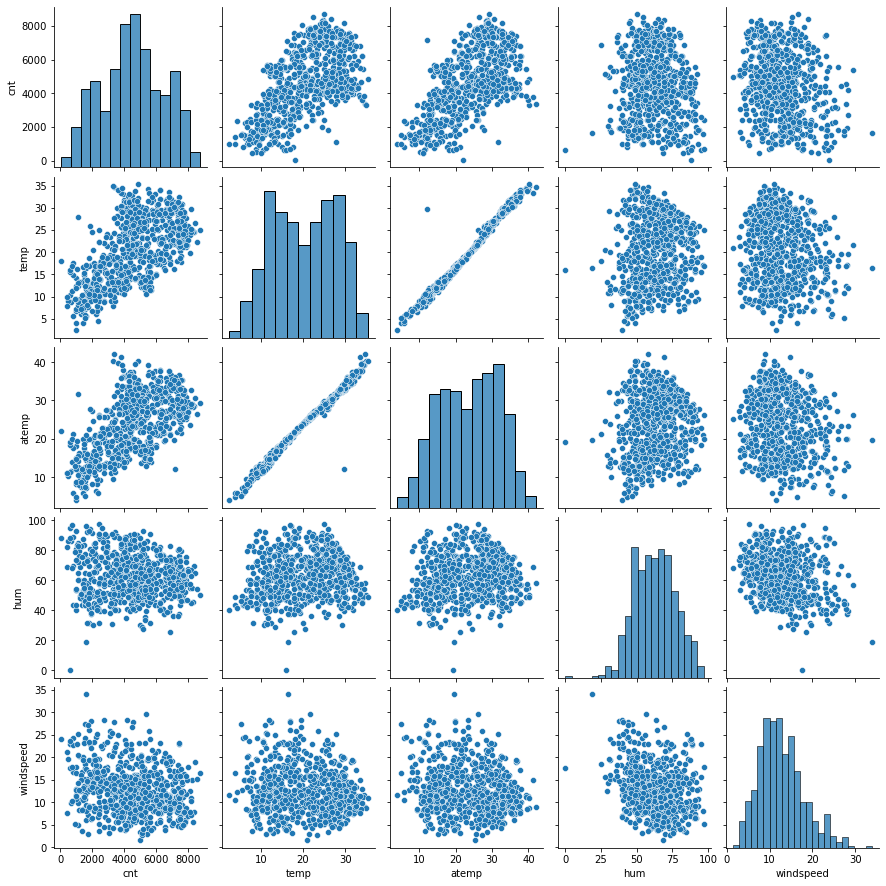

In [9]:
# Plot the numeric columns
sns.pairplot(bike_df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

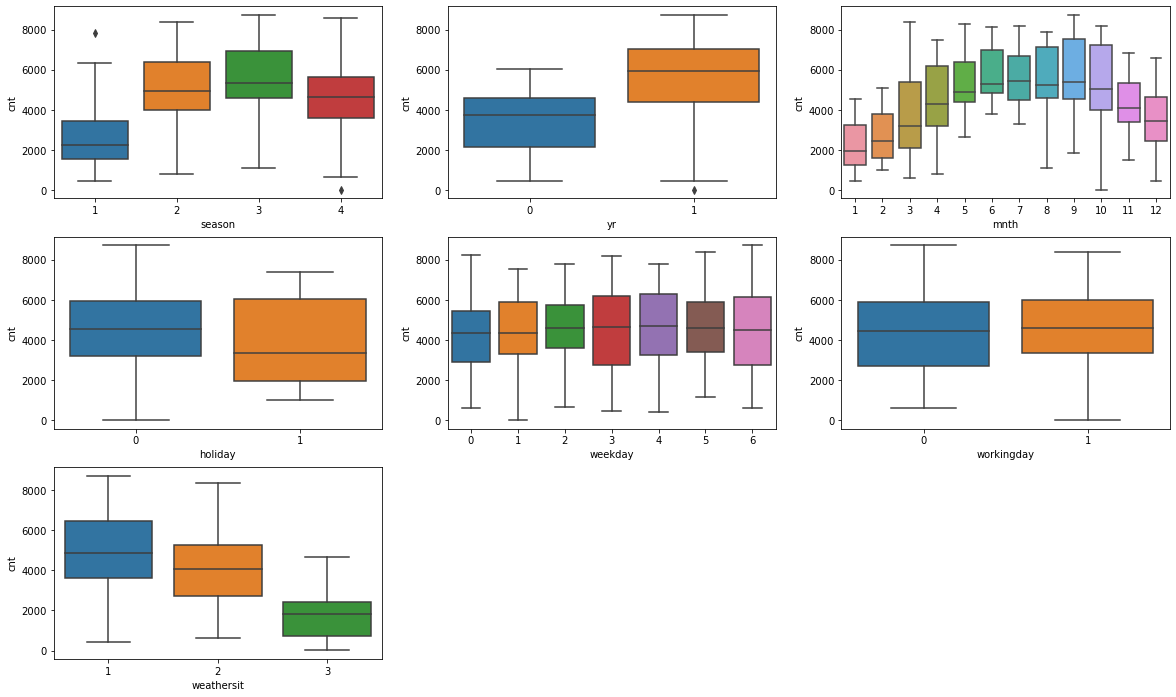

In [10]:
# Plot the categorical columns against 'cnt' which is the target variable
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

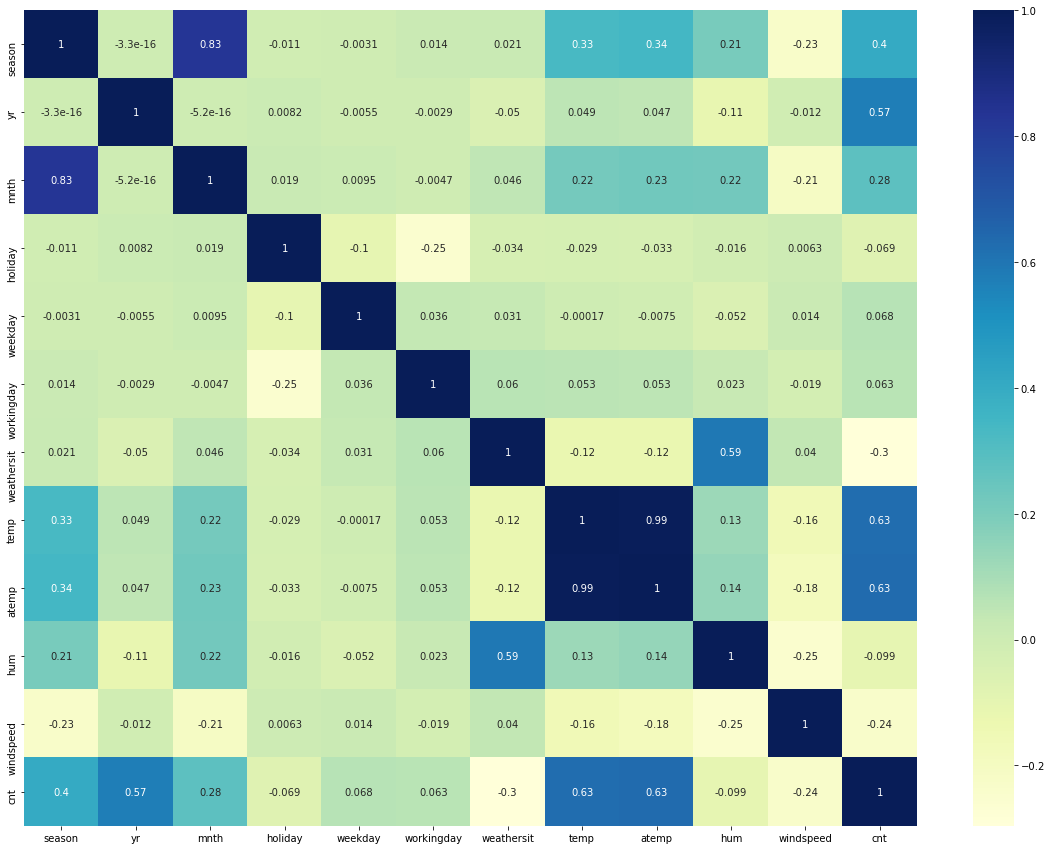

In [11]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [12]:
# co-relation between temp and atemp is 0.99 which is almost 1 , hence we can drop one of them
# let us drop temp and keep atemp

# bike_df.drop('temp', axis = 1, inplace = True)

## Step 3: Data Preparation

In [13]:
# convert categorical variable to their actual values

bike_df['season'] = bike_df[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
bike_df['weathersit'] = bike_df[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}))
bike_df['mnth'] = bike_df[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))
bike_df['weekday'] = bike_df[['weekday']].apply(lambda x: x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}))

In [14]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Create dummy variables

In [15]:
# create dummy variables for 'season' and add to the bike_df

# create new season df
season = pd.get_dummies(bike_df['season'], drop_first = True)

# Check what the dataset 'season' looks like
season.head()

# Add the results to the original bike_df dataframe
bike_df = pd.concat([bike_df, season], axis = 1)

# Now let's see the head of our bike_df dataframe.
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [16]:
# create dummy variables for 'weathersit' and add to the bike_df

# create new weathersit df
weathersit = pd.get_dummies(bike_df['weathersit'], drop_first = True)

# Check what the dataset 'weathersit' looks like
weathersit.head()

# Add the results to the original bike_df dataframe
bike_df = pd.concat([bike_df, weathersit], axis = 1)

# Now let's see the head of our bike_df dataframe.
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,Mist
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [17]:
# create dummy variables for 'mnth' and add to the bike_df

# create new mnth df
mnth = pd.get_dummies(bike_df['mnth'], drop_first = True)

# Check what the dataset 'mnth' looks like
mnth.head()

# Add the results to the original bike_df dataframe
bike_df = pd.concat([bike_df, mnth], axis = 1)

# Now let's see the head of our bike_df dataframe.
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# create dummy variables for 'weekday' and add to the bike_df

# create new weekday df
weekday = pd.get_dummies(bike_df['weekday'], drop_first = True)

# Check what the dataset 'weekday' looks like
weekday.head()

# Add the results to the original bike_df dataframe
bike_df = pd.concat([bike_df, weekday], axis = 1)

# Now let's see the head of our bike_df dataframe.
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [19]:
# Drop ['season', 'weathersit', 'mnth', 'weekday'] as we have created the dummies for it
bike_df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)

bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Light Snow  730 non-null    uint8  
 12  Mist        730 non-null    uint8  
 13  Aug         730 non-null    uint8  
 14  Dec         730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  Jan         730 non-null    uint8  
 17  Jul         730 non-null    uint8  
 18  Jun         730 non-null    uint8  
 19  Mar         730 non-null    u

## Step 4: Creating training and test dataset

In [21]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5: Feature scaling

In [22]:
# create a scaler object
scaler = MinMaxScaler()

In [23]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum','windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


In [25]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 6: Building the model

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 18),
 ('Winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', False, 2),
 ('Aug', False, 9),
 ('Dec', False, 5),
 ('Feb', False, 8),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 20),
 ('May', False, 19),
 ('Nov', False, 4),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 14),
 ('Sat', False, 6),
 ('Sun', False, 13),
 ('Thu', False, 16),
 ('Tue', False, 15),
 ('Wed', False, 17)]

In [29]:
# variables considered for the model
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter',
       'Light Snow', 'Jul', 'Sep'],
      dtype='object')

In [30]:
# variables NOT considered for the model
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Summer', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [32]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [33]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [34]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.53e-184
Time:                        18:50:20   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

### All p values are low hence the variables are significant, no need to drop any variable by p value for now

In [35]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,Spring,2.40
0,yr,2.06
6,Winter,1.98
8,Jul,1.40
9,Sep,1.20
7,Light Snow,1.11
1,holiday,1.04


### hum has very high VIF , dropping it

In [36]:
# drop 'hum' columns
X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [37]:
# adding constant
X_train_lm = sm.add_constant(X_train_new)

In [38]:
# Running the linear model again
lm = sm.OLS(y_train,X_train_lm).fit()

In [39]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.33e-171
Time:                        18:50:20   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2042      0.025      8.095      0.0

### All variables are significant as the p values are low (< 0.05)

In [40]:
# Calculate the VIFs for the model again after dropping 'hum'
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,Spring,1.61
5,Winter,1.37
7,Jul,1.34
8,Sep,1.20
6,Light Snow,1.06
1,holiday,1.04


### All VIF values are < 5 , no need to drop anymore now

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [41]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

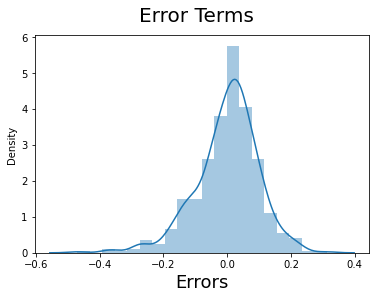

In [42]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Residual Distribution is seen to follow the normal distribution and is centred around 0

## Step 8: Making Predictions

#### Applying the scaling on the test sets

In [43]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [44]:
y_test = df_test.pop('cnt')
X_test = df_test

In [45]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [46]:
# Making predictions
y_pred = lm.predict(X_test_new)

## r2_score

In [47]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045292

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

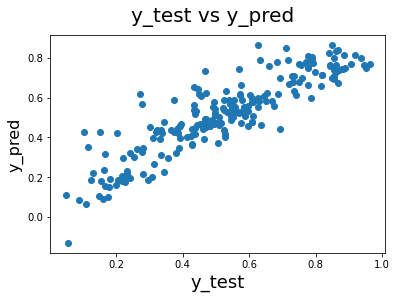

In [48]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [49]:
# print the model summary again
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.33e-171
Time:                        18:50:23   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2042      0.025      8.095      0.000       0.155       0.254
yr             0.2350      0.009     26.233      0.000       0.217       0.253
holiday       -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp           0.4758      0.033     14.453      0.000       0.411       0.540
windspeed     -0.1325      0.027     -4.879      0.000      -0.186      -0.079
Spring        -0.1032      0.016     -6.274      0.000      -0.136      -0.071
Winter         0.0504      0.013      3.754      0.000       0.024       0.077
Light Snow    -0.2562      0.027     -9.608      0.000      -0.309      -0.204
Jul           -0.0616      0.019     -3.272      0.001      -0.099      -0.025
Sep            0.0498      0.017      2.911      0.004       0.016       0.083
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# print the co-efficients
round(lm.params, 4).sort_values(ascending = False)

temp          0.4758
yr            0.2350
const         0.2042
Winter        0.0504
Sep           0.0498
Jul          -0.0616
holiday      -0.0862
Spring       -0.1032
windspeed    -0.1325
Light Snow   -0.2562
dtype: float64

## The equation for best fitted line is:

### cnt = 0.2042 + 0.4758 X temp + 0.2350 X yr + 0.0504 X season-winter + 0.0498 X mnth-Sep - 0.0616 X mnth-Jul - 0.0862 X holiday - 0.1032 X season-spring - 0.1325 X windspeed - 0.2562 X weathersit-Light Snow

## Conclusion

### 1. All positive co-efficients indicate that with the increase in the variable values the target variable 'cnt' will increase (e.g. temp, yr, season-winter, mnth-Sep)

### 2. All negative co-efficients indicate that with the increase in the variable values the target variable 'cnt' will decrease (e.g. mnth-July, holiday, season-spring, windspeed, weathersit-Light Snow)

### 3. 'temp' is the most significant variable for target variable 'cnt' as it has highest co-efficient

### 4. The target variable 'cnt' reduces during Light Snow, Light Rain + Thunderstorm + Scattered clouds weather,  windspeed & holidays

### 5. The target variable 'cnt' is more during yr (2019) , winter and in mnth-Sep